In [510]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [511]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [512]:
len(words)

32033

In [513]:

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [514]:
block_size = 3 
X, Y = [], []
for w in words:

    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        # crop and append 
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [515]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [516]:

# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [517]:
n1, n2

(25626, 28829)

In [518]:
C = torch.randn([27, 2])
C

tensor([[ 1.5137,  0.2827],
        [ 0.7268, -1.1763],
        [ 0.3074,  0.9278],
        [-1.8556,  0.0156],
        [ 0.7632, -2.3349],
        [ 1.6703, -1.4873],
        [-1.4644,  1.3262],
        [-2.2287,  0.1803],
        [-1.2236, -0.2325],
        [ 0.9951, -0.0637],
        [ 0.6950, -1.5574],
        [ 0.9404,  1.1077],
        [ 1.5128, -0.6618],
        [ 0.2161,  2.2583],
        [ 0.6007, -0.3944],
        [ 1.9468,  1.2942],
        [ 0.6340, -1.6096],
        [-0.3583,  0.4965],
        [-2.8027,  0.4868],
        [ 0.8387,  0.7819],
        [-0.0786, -1.6984],
        [-0.1237, -0.1298],
        [-0.4959,  1.2547],
        [ 0.8992,  0.8521],
        [-0.2729, -0.1246],
        [-0.1999, -0.7208],
        [-0.6727,  0.9969]])

In [164]:
C[5]

tensor([0.5491, 0.9066])

In [519]:
F.one_hot(torch.tensor(5), num_classes=27).dtype

torch.int64

In [520]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 1.6703, -1.4873])

In [521]:
C[torch.tensor([5,6,7,7])]

tensor([[ 1.6703, -1.4873],
        [-1.4644,  1.3262],
        [-2.2287,  0.1803],
        [-2.2287,  0.1803]])

In [522]:
C[X].shape

torch.Size([228146, 3, 2])

In [169]:
X[13, 2]

tensor(1)

In [170]:
# the embedding for the 13th word
C[X[13, 2]]

tensor([0.1331, 0.3358])

In [171]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [172]:
# the hidden layer
# 2 dimesional embeddings, and 
# we have 3 of them
# so we have 6 inputs
W1  = torch.randn([6, 100])
b1  = torch.randn([100])

In [173]:
# emb @ W1 + b1
# rough ly what we ant to do 


In [174]:
# the hidden layer
h = torch.tanh(emb.view([-1, 6]) @ W1 + b1)


In [175]:
h.shape

torch.Size([228146, 100])

In [176]:
# broadcasting effects
# 32, 100
#  1, 100

In [177]:
# the output layer
W2 = torch.randn([100, 27])
b2 = torch.randn([27])

logits = h @ W2 + b2

In [178]:
logits.shape

torch.Size([228146, 27])

In [179]:
loss = F.cross_entropy(logits, Y)

In [180]:
loss

tensor(17.9936)

In [453]:
Xtr.shape

torch.Size([182625, 3])

In [454]:
Ytr.shape

torch.Size([182625])

In [538]:

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [539]:
sum(p.numel() for p in parameters)

6097

In [540]:
for p in parameters:
    p.requires_grad = True

In [541]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [542]:
lri = []
lossi = []
stepi = []

In [548]:

for i in range(10000):  
    #minibatch 
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass 
    emb = C[Xtr[ix]] # 32, 3, 2
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32, 100
    logits = h @ W2 + b2 # 32, 27
    loss = F.cross_entropy(logits, Ytr[ix])
    # backward pass
    for p in parameters: p.grad = None
    loss.backward()
    # lr = lrs[i]
    for p in parameters: 
        p.data += -0.01 * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())


1.951244831085205


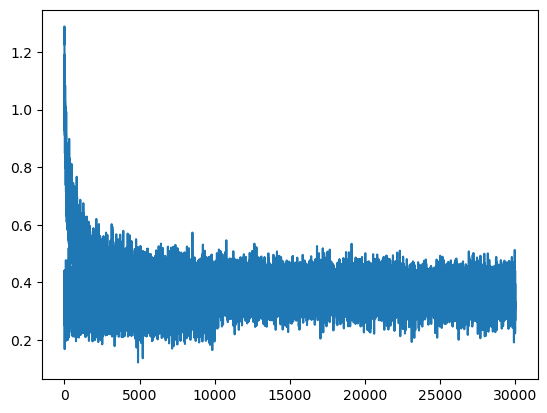

In [549]:

plt.plot(stepi, lossi)


In [550]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()


2.234184741973877

In [551]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss.item()


2.2194972038269043

In [552]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

careah.
amelle.
khiemli.
revick.
kanden.
jazhnen.
delynn.
jarqui.
nellaishceriiv.
kaleigh.
ham.
joce.
quinn.
shojora.
jadis.
wazelon.
jaryx.
kar.
eviigsan.
ed.
